# CS 5408 - Game Theory for Computing

## Topic 1: Decision Theory -- Saint Petersberg Paradox
\
COPYRIGHTS: © Sid Nadendla, 2021

### Choice Experiment

* Flip an unbiased coin over multiple iterations. 
* In the first iteration, you win
$$r_1 = \begin{cases} 2, & \text{if "Heads"}, \\ 0, & \text{otherwise} \end{cases}.$$
* In the second iteration, you win
$$r_2 = \begin{cases} 4, & \text{if "Heads" in all previous iterations}, \\ 0, & \text{otherwise} \end{cases}.$$
* In the third iteration, you win
$$r_3 = \begin{cases} 8, & \text{if "Heads" in all previous iterations}, \\ 0, & \text{otherwise} \end{cases}.$$
* Upon $n$ iterations, you win
$$r_n = \begin{cases} 2^n, & \text{if "Heads" in all previous iterations}, \\ 0, & \text{otherwise} \end{cases}.$$

The net reward that you obtain after $N$ iterations is given by
$$ R_N = \displaystyle \sum_{n = 1}^{N} r_n. $$

#### <font color='red'>If you are asked to choose $N$ before the experiment is conducted, what would you choose?</font>

In [109]:
!pip install numpy
!pip install matplotlib

In [110]:
import numpy as np
import matplotlib.pyplot as plt

### Monte-Carlo Simulation

#### Section 1: Basic Style

In [130]:
def SaintPetersburg1(iteration,state):
    
    # Initialize instantaneous reward to zero
    reward = 0
    
    # COIN TOSS EXPERIMENT:
    # Generate a uniformly distributed random variable in [0,1]. 
    # If it is greater than 0.5, then declare HEADS. Otherwise, TAILS.
    if np.random.uniform() > 0.5:
        toss = 1 # 1 represents HEADS
    else:
        toss = 0 # 0 represents TAILS
        state = 1
    
    # Compute the instantaneous reward
    if ((toss == 1) and (state == 0)):
        reward = 2**(iteration+1)
    
    return reward, state

**Choice Experiment:**

In [133]:
# Choice variable, i.e. the number of times you wish to toss the coin.
N = int(input("Enter the number of iterations you want to run the experiment:"))

# Initialize variables
experiment_state = 0
instantaneous_reward = np.zeros(N)
final_reward = 0

# Toss the coin N times, and compute the total reward.
for n in range(N):
    instantaneous_reward[n], experiment_state = SaintPetersburg1(n,experiment_state)
    if state == 1:
            final_reward = np.sum(instantaneous_reward[:n+1])

# Print all instantaneous rewards and total reward from this choice experiment
print(f"Your rewards per iteration are: {instantaneous_reward}")
print(f"Your total reward: {final_reward}")

Enter the number of iterations you want to run the experiment:20
Your rewards per iteration are: [2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Your total reward: 2.0


**Empirical Distribution of Rewards:**

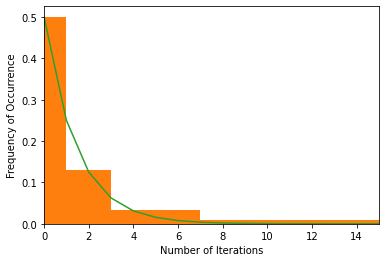

In [138]:
# Number of Monte-Carlo Runs
K = 1000 

# Number of iterations per Monte-Carlo run.
N = 100 

# Initialize variables
total_reward = np.zeros(K)
inst_reward = np.zeros((K,N))
prob = np.zeros(N)

# Toss the coin N times, and compute the total reward in each Monte-Carlo run
for k in range(K):
    state = 0
    for n in range(N):
        inst_reward[k,n], state = SaintPetersburg1(n,state)
        if state == 1:
            total_reward[k] = np.sum(inst_reward[k,:n])

# Plot the histogram (empirical distribution)
plt.hist(total_reward, bins=[0, 1, 3, 7, 15, 31], density=True,color="C1")

# Compute the actual probability of different outcomes
for n in range(N):
    prob[n] = 1/2**(n+1)
plt.xlim(0,15)

# Overlay the probability plot onto the histogram
plt.plot(prob,color="C2")
plt.xlabel("Number of Iterations")
plt.ylabel("Frequency of Occurrence")
plt.show()

**Computation of Average Rewards:** Consider the $n^{th}$ iteration. 
* In order to obtain a non-zero reward in this iteration, we need to observe HEADS in this and all previous iterations.
* The probability of such an event is $p_n = \left( \frac{1}{2} \times \cdots \times \frac{1}{2} \right)_{n\text{ times}} = \frac{1}{2^n}$.
* Given that the instantaneous reward is $r_n = \begin{cases} 2^n, & \text{if "Heads" in all previous iterations}, \\ 0, & \text{otherwise} \end{cases}$, the average reward after $N$ iterations is given by
$$\mathbb{E}(R_N) = \displaystyle \sum_{n = 1}^N p_n r_n = \displaystyle \sum_{n = 1}^N \left[ \left( \frac{1}{2^n} \right) \cdot 2^n + \left( 1 - \frac{1}{2^n} \right) \cdot 0 \right] = N.$$
* On the other hand, Bernoulli claimed that people work with logarithmic utilities, i.e. $u_n = \log r_n$.
* Therefore, the expected utility at the human decision maker is
$$\mathbb{E}(U_N) = \displaystyle \sum_{n = 1}^N p_n u_n = \displaystyle \sum_{n = 1}^N p_n \log_2(r_n) = \displaystyle \sum_{n = 1}^N \left[ \left( \frac{1}{2^n} \right) \cdot n + \left( 1 - \frac{1}{2^n} \right) \cdot 0 \right] = 2 - \frac{N+2}{2^N}.$$

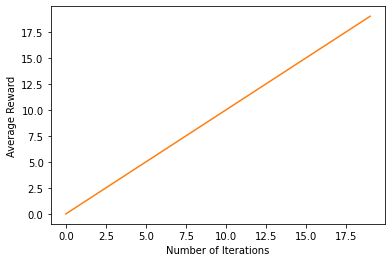

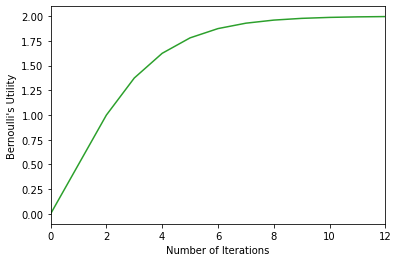

In [135]:
# Initialize variables
reward = np.zeros(N)
log_reward = np.zeros(N)
av_reward = np.zeros(N)
log_utility = np.zeros(N)

# Compute the expected reward (theoretical)
for n in range(N):
    reward[n] = 2**(n+1)
    log_reward[n] = np.log2(reward[n])
    av_reward[n] = np.sum(prob[:n]*reward[:n])
    log_utility[n] = np.sum(prob[:n]*log_reward[:n])
    
# Plot expected reward and Bernoulli's utility (expected log-reward)
# Remark 1: Expected reward linearly increases with the number of iterations.
plt.plot(av_reward,color="C1")
plt.xlabel("Number of Iterations")
plt.ylabel("Average Reward")
plt.show()

# Remark 2: Bernoulli's utility converges to some finite value after a few iterations.
plt.plot(log_utility,color="C2")
plt.xlabel("Number of Iterations")
plt.ylabel("Bernoulli's Utility")
plt.xlim(0,12)
plt.show()

#### Section 2: Using Classes and Objects

In [167]:
class Saint_Petersberg(object):
    def __init__(self, N):
        self.N = N
        self.state = 0
        self.rewards = np.zeros(N)
        self.total_reward = 0
        self.iteration = 0

    def __repr__(self): 
        return f"""Instantaneous Rewards : {self.rewards}\
        \nTotal Reward : {self.total_reward}\
        \n"""
    
    def coin_toss(self):
        if np.random.uniform() > 0.5:
            toss = 1 # 1 represents HEADS
        else:
            toss = 0 # 0 represents TAILS
        return toss

    def inst_reward(self):
        reward_ = 0
        if ((self.coin_toss() == 1) and (self.state == 0)):
            reward_ = 2**(self.iteration+1)
        else:
            self.state = 1
        self.iteration+=1
        return reward_

    def play_game(self):
        for i in range(self.N):
            self.rewards[i] = self.inst_reward()
        self.total_reward = np.sum(self.rewards)

In [168]:
N = int(input("Enter the number of tosses you wish to play: "))
st_petersberg_exp = Saint_Petersberg(N)
st_petersberg_exp.play_game()
print(st_petersberg_exp)

Enter the number of tosses you wish to play: 5
Instantaneous Rewards : [0. 0. 0. 0. 0.]        
Total Reward : 0.0        



In [169]:
for _ in range(20):
    st_petersberg_exp = Saint_Petersberg(N)
    st_petersberg_exp.play_game()
    print(st_petersberg_exp)

Instantaneous Rewards : [0. 0. 0. 0. 0.]        
Total Reward : 0.0        

Instantaneous Rewards : [ 2.  4.  8. 16. 32.]        
Total Reward : 62.0        

Instantaneous Rewards : [2. 0. 0. 0. 0.]        
Total Reward : 2.0        

Instantaneous Rewards : [0. 0. 0. 0. 0.]        
Total Reward : 0.0        

Instantaneous Rewards : [0. 0. 0. 0. 0.]        
Total Reward : 0.0        

Instantaneous Rewards : [0. 0. 0. 0. 0.]        
Total Reward : 0.0        

Instantaneous Rewards : [0. 0. 0. 0. 0.]        
Total Reward : 0.0        

Instantaneous Rewards : [2. 0. 0. 0. 0.]        
Total Reward : 2.0        

Instantaneous Rewards : [0. 0. 0. 0. 0.]        
Total Reward : 0.0        

Instantaneous Rewards : [0. 0. 0. 0. 0.]        
Total Reward : 0.0        

Instantaneous Rewards : [2. 0. 0. 0. 0.]        
Total Reward : 2.0        

Instantaneous Rewards : [2. 0. 0. 0. 0.]        
Total Reward : 2.0        

Instantaneous Rewards : [0. 0. 0. 0. 0.]        
Total Reward : 0.0   